In [199]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import wilcoxon
from sklearn.preprocessing import StandardScaler


In [3]:
# Windows 용 한글 폰트 오류 해결
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [91]:
df = pd.read_excel('1-9호선 통합본(중복 제거).xlsx')

In [93]:
df

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수
0,0,동대문,1호선,23812,35181,16032,2,3400.0,2090.0,1.0,0,1.0,1.0,1.0,30,25.0,47,0
1,1,동묘앞,1호선,21015,37417,12384,2,5700.0,4194.0,1.0,0,4.0,12.0,12.0,6,9.0,43,0
2,2,서울역,1호선,105211,139845,65919,2,8725.0,2080.0,1.0,0,1.0,5.0,5.0,10,64.0,NaN,0
3,3,시청,1호선,49914,74556,17937,2,6863.0,3784.0,6.0,0,1.0,3.0,3.0,25,44.0,68,1
4,4,신설동,1호선,26842,37009,9983,2,4164.0,3076.0,NaN,0,1.0,NaN,NaN,66,9.0,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,308,종합운동장,9호선,9845,15620,2730,2,NaN,NaN,2.0,1,2.0,18.0,6.0,20,NaN,35,0
309,309,중앙보훈병원,9호선,20851,29135,5508,1,NaN,NaN,1.0,1,1.0,10.0,5.0,210,9.0,-,1
310,310,증미,9호선,14372,20485,3537,1,NaN,NaN,NaN,1,1.0,18.0,3.0,30,NaN,66,0
311,311,한성백제,9호선,5735,14163,1628,1,NaN,NaN,NaN,1,1.0,10.0,3.0,200,9.0,-,0


In [95]:
df = df.drop(columns = "Unnamed: 0")

In [69]:
df.columns

Index(['역명', '노선명', 'mean', 'max', 'min', '노선개수', '대합실면적', '승강장면적', '지하상가 개수',
       '역내편의점 개수', '화장실개수', '에스컬레이터 대수', '엘리베이터 대수', '자전거보관소 대수', '물품보관함 개수',
       '소화기 대수', '스마트도서관 개수', '노선구분'],
      dtype='object')

In [21]:
df["노선개수"].unique()

array([2, 1, 3], dtype=int64)

In [97]:
df["노선구분"] = df["노선개수"].apply(lambda x: '1개' if x == 1 else '2개 이상')

In [99]:
df

,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수,노선구분
0,동대문,1호선,23812,35181,16032,2,3400.0,2090.0,1.0,0,1.0,1.0,1.0,30,25.0,47,0,2개 이상
1,동묘앞,1호선,21015,37417,12384,2,5700.0,4194.0,1.0,0,4.0,12.0,12.0,6,9.0,43,0,2개 이상
2,서울역,1호선,105211,139845,65919,2,8725.0,2080.0,1.0,0,1.0,5.0,5.0,10,64.0,NaN,0,2개 이상
3,시청,1호선,49914,74556,17937,2,6863.0,3784.0,6.0,0,1.0,3.0,3.0,25,44.0,68,1,2개 이상
4,신설동,1호선,26842,37009,9983,2,4164.0,3076.0,NaN,0,1.0,NaN,NaN,66,9.0,46,0,2개 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,종합운동장,9호선,9845,15620,2730,2,NaN,NaN,2.0,1,2.0,18.0,6.0,20,NaN,35,0,2개 이상
309,중앙보훈병원,9호선,20851,29135,5508,1,NaN,NaN,1.0,1,1.0,10.0,5.0,210,9.0,-,1,1개
310,증미,9호선,14372,20485,3537,1,NaN,NaN,NaN,1,1.0,18.0,3.0,30,NaN,66,0,1개
311,한성백제,9호선,5735,14163,1628,1,NaN,NaN,NaN,1,1.0,10.0,3.0,200,9.0,-,0,1개


In [107]:
# 화장실 개수만 추출하기 위한 전처리
df_toilet = df[["역명", "노선명", "노선개수", "노선구분", "화장실개수"]]

In [111]:
# 결측치 제거
df_toilet = df_toilet.dropna()

In [113]:
df_toilet

,역명,노선명,노선개수,노선구분,화장실개수
0,동대문,1호선,2,2개 이상,1.0
1,동묘앞,1호선,2,2개 이상,4.0
2,서울역,1호선,2,2개 이상,1.0
3,시청,1호선,2,2개 이상,1.0
4,신설동,1호선,2,2개 이상,1.0
...,...,...,...,...,...
308,종합운동장,9호선,2,2개 이상,2.0
309,중앙보훈병원,9호선,1,1개,1.0
310,증미,9호선,1,1개,1.0
311,한성백제,9호선,1,1개,1.0


In [115]:
grouped = df_toilet.groupby("노선구분")["화장실개수"].mean().reset_index()

In [117]:
grouped

,노선구분,화장실개수
0,1개,1.102222
1,2개 이상,1.294872


C:\Users\ITSC\AppData\Local\Temp\ipykernel_4924\666674215.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="노선구분", x="화장실개수", data = grouped, orient = 'h', palette = 'coolwarm')


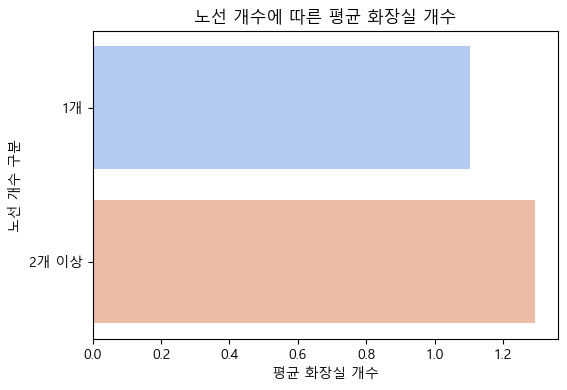

In [119]:
plt.figure(figsize = (6,4))
sns.barplot(y="노선구분", x="화장실개수", data = grouped, orient = 'h', palette = 'coolwarm')

plt.xlabel('평균 화장실 개수')
plt.ylabel('노선 개수 구분')
plt.title('노선 개수에 따른 평균 화장실 개수')

plt.show()

In [121]:
grouped3 = df_toilet.groupby("노선개수")["화장실개수"].mean().reset_index()

C:\Users\ITSC\AppData\Local\Temp\ipykernel_4924\163155162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="노선개수", x="화장실개수", data = grouped3, orient = 'h', palette = 'coolwarm')


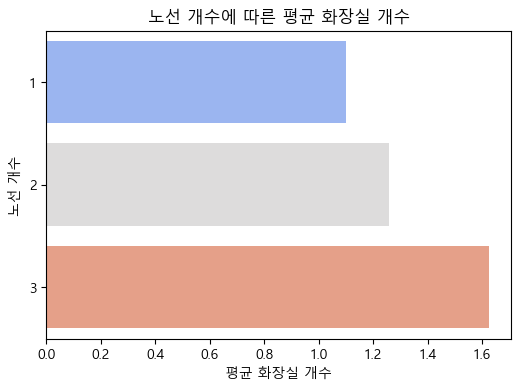

In [207]:
plt.figure(figsize = (6,4))
sns.barplot(y="노선개수", x="화장실개수", data = grouped3, orient = 'h', palette = 'coolwarm')

plt.xlabel('평균 화장실 개수')
plt.ylabel('노선 개수')
plt.title('노선 개수에 따른 평균 화장실 개수')
plt.savefig("./toilet_count.png")

plt.show()

In [201]:
group1 = df_toilet[df_toilet["노선개수"]==1][["화장실개수"]]
group2 = df_toilet[df_toilet["노선개수"]==2][["화장실개수"]]
group3 = df_toilet[df_toilet["노선개수"]==3][["화장실개수"]]

In [203]:
group1

,화장실개수
5,1.0
6,2.0
8,1.0
9,1.0
10,1.0
...,...
306,1.0
309,1.0
310,1.0
311,1.0


In [165]:
# 정규성 검정
print(stats.shapiro(group1))
print(stats.shapiro(group2))
print(stats.shapiro(group3))

ShapiroResult(statistic=0.315931853740541, pvalue=3.561052331786815e-28)
ShapiroResult(statistic=0.5109193777904186, pvalue=6.615441666951039e-14)
ShapiroResult(statistic=0.6756038948720027, pvalue=0.0011896910611405636)


- 세그룹 모두 정규성 불만족

In [168]:
# 등분산성 검정
stats.levene(group1,group2,group3)

LeveneResult(statistic=8.375972259384936, pvalue=0.0002885989573429912)

- 세그룹 등분산성 만족

In [183]:
# ANOVA 검정
F_statistic, p_value = stats.f_oneway(group1,group2,group3)

In [185]:
print(f"일원분산분석 결과 : F = {F_statistic}, p = {p_value:.5f}")

일원분산분석 결과 : F = 8.375972259384934, p = 0.00029


In [211]:
# 사후검정
tukey = pairwise_tukeyhsd(df_toilet["화장실개수"], df_toilet["노선개수"])
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1549 0.0248  0.0158 0.2941   True
     1      3   0.5228 0.0025   0.157 0.8886   True
     2      3   0.3679 0.0597 -0.0116 0.7473  False
---------------------------------------------------


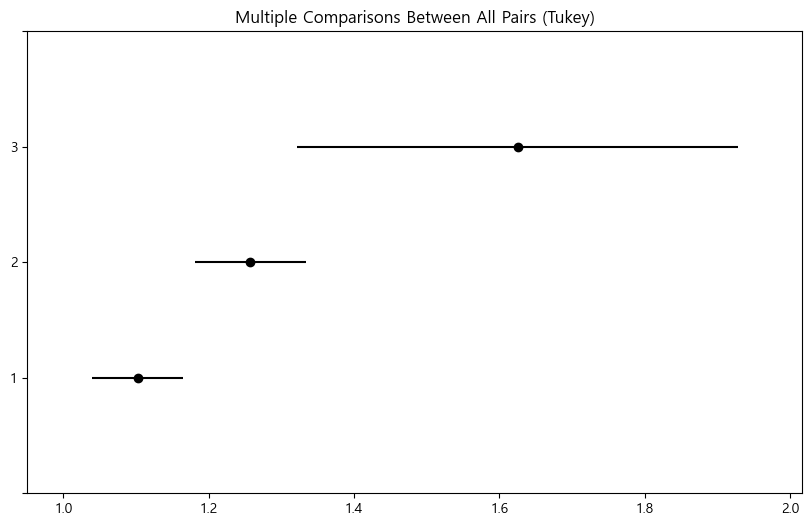

In [191]:
fig = tukey.plot_simultaneous()

- 노선개수가 1개인 역은 2개, 3개인 역보다 화장실 개수가 유의미하게 적음
- 노선개수가 2개, 3개인 역의 화장실 개수에는 유의미한 차이가 없음 (p-value가 0.05 이상)

In [75]:
df2 = pd.read_excel('1-9호선 통합본(중복제거).xlsx')

In [83]:
df2 = df2.drop(columns = "Unnamed: 0")

In [89]:
df2.to_excel('1-9호선 통합본(중복 제거).xlsx')